In [ ]:
!nvidia-smi

Sun Dec 29 15:41:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 57.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 912, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'export', 'track', 'predict', 'train', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'detect', 'pose', 'segment'}
                MODE (required) is one of {'val', 'export', 'track', 'predict', 'train', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dBg8tVKRRE4DJukjCsdX")
project = rf.workspace("sushant-faqf6").project("indiancurrency")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IndianCurrency-4 in yolov8:: 100%|██████████| 1486/1486 [00:00<00:00, 7319.34it/s]


In [ ]:

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:01<00:00, 47.1MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/IndianCurrency-4/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

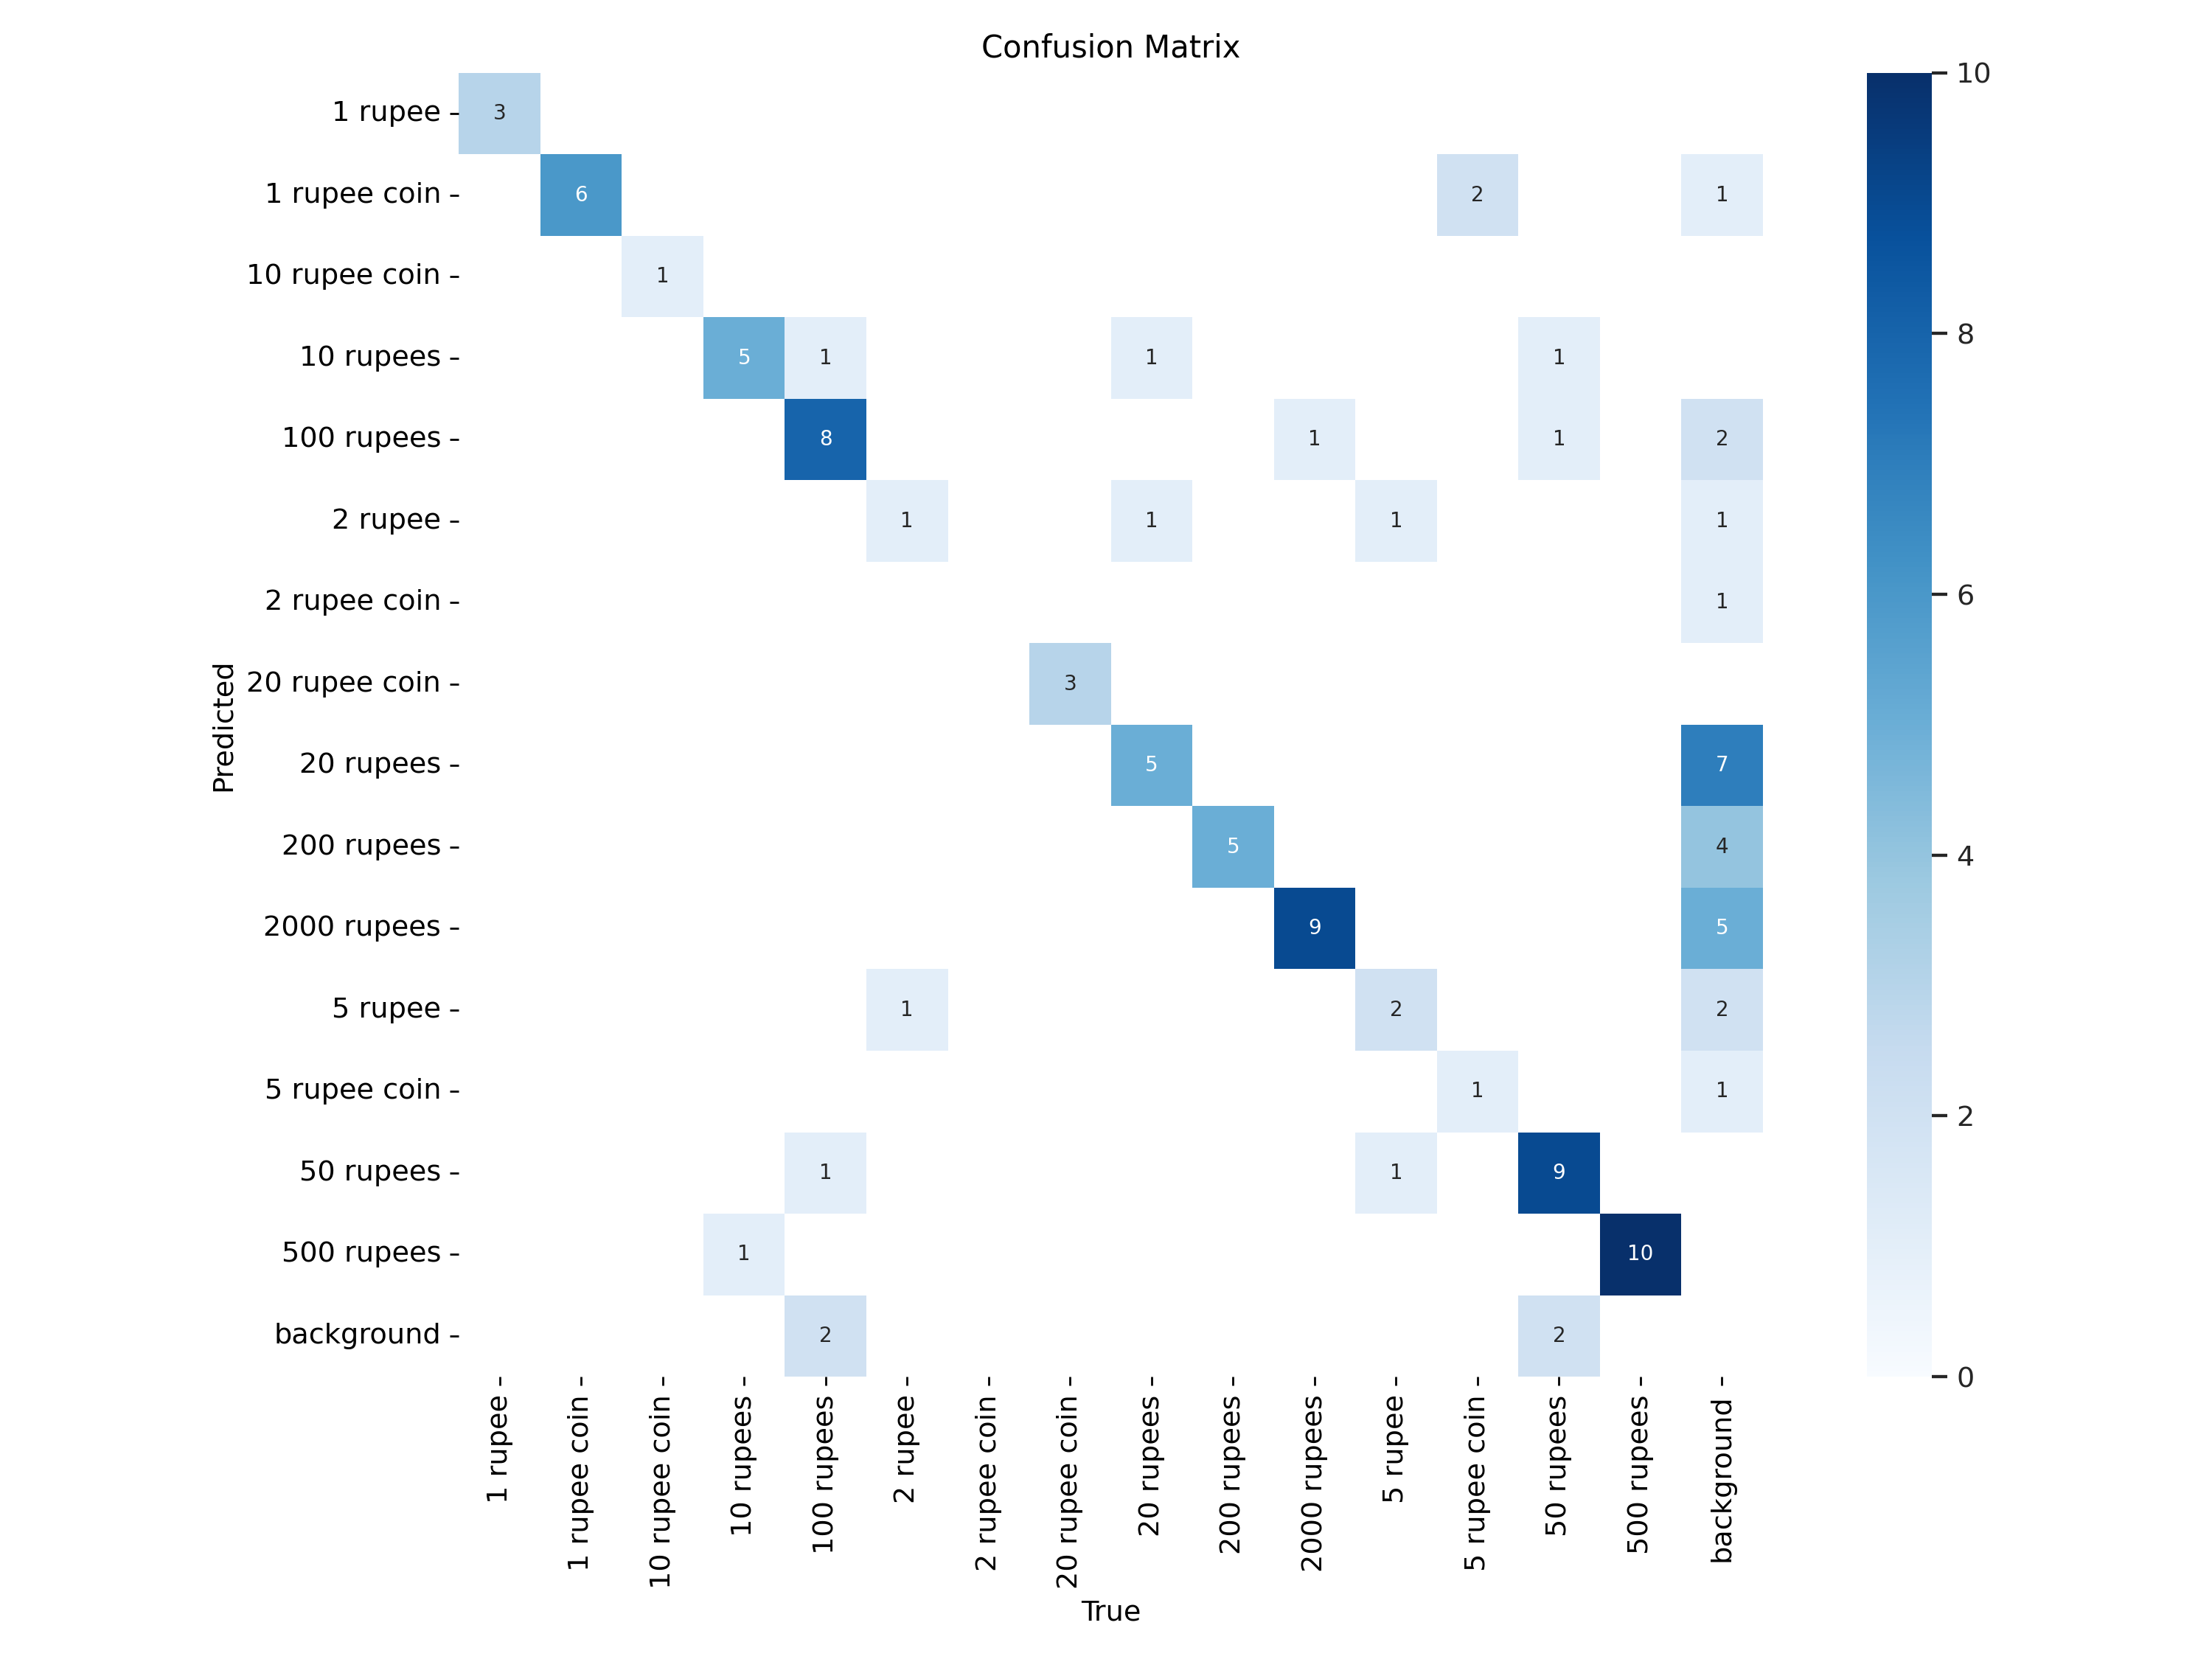

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

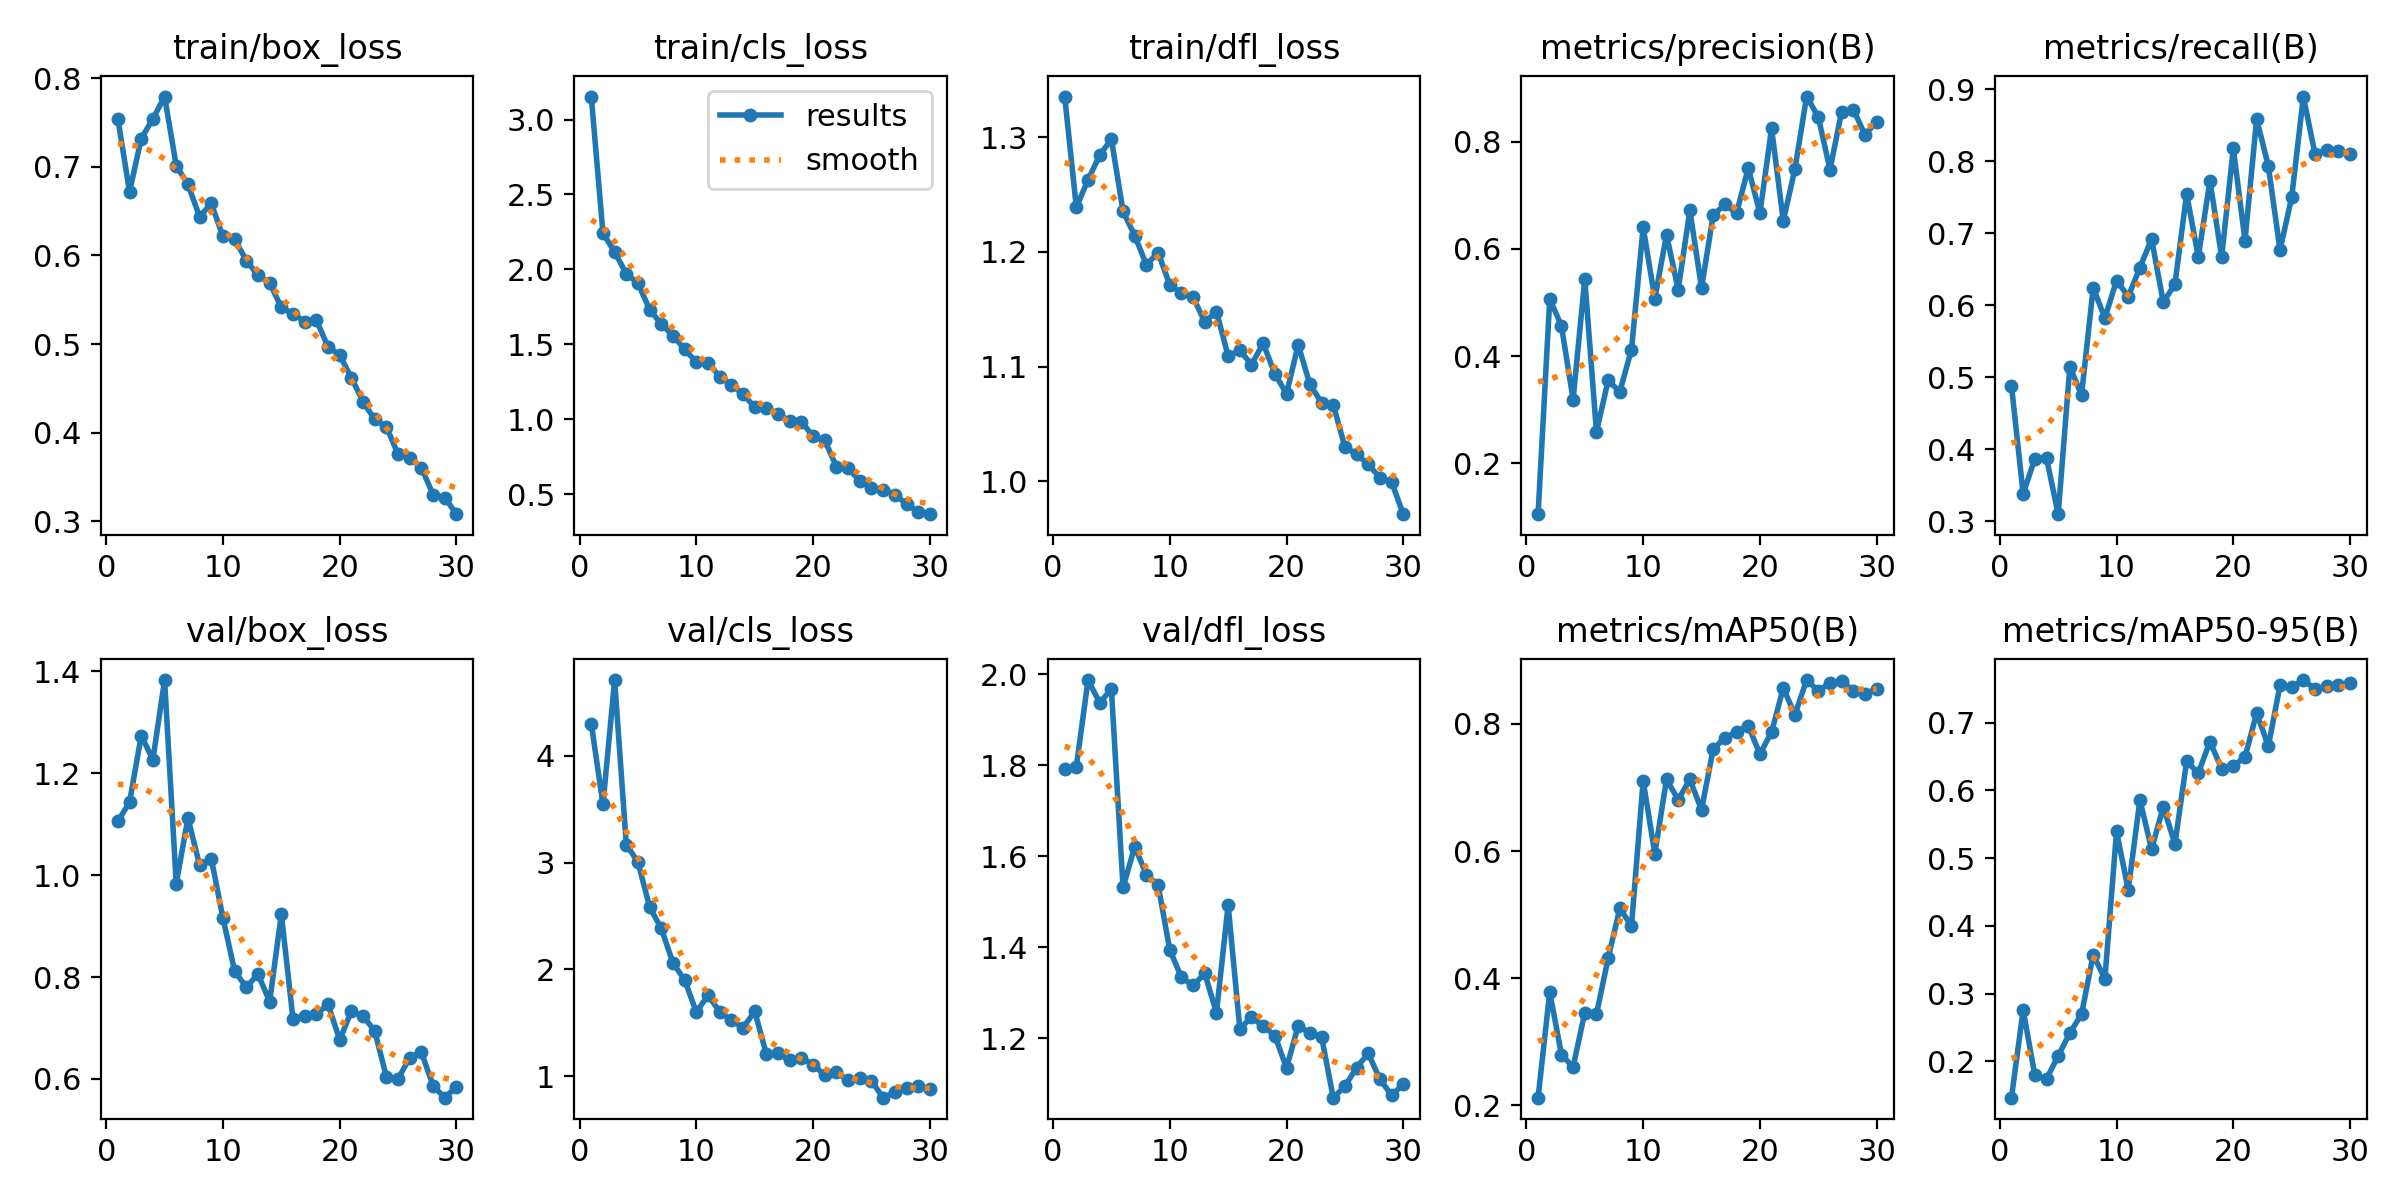

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/IndianCurrency-4/valid/labels.cache... 61 images, 1 backgrounds, 0 corrupt: 100% 61/61 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 85. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.29it/s]
                   all         61         85      0.748       0.89      0.863      0.763
               1 rupee          3          3      0.838          1      0.995      0.963
          1 rupee coin          6          6      0.641          1      0.913      0.838
         10 rupee coin          1          1   

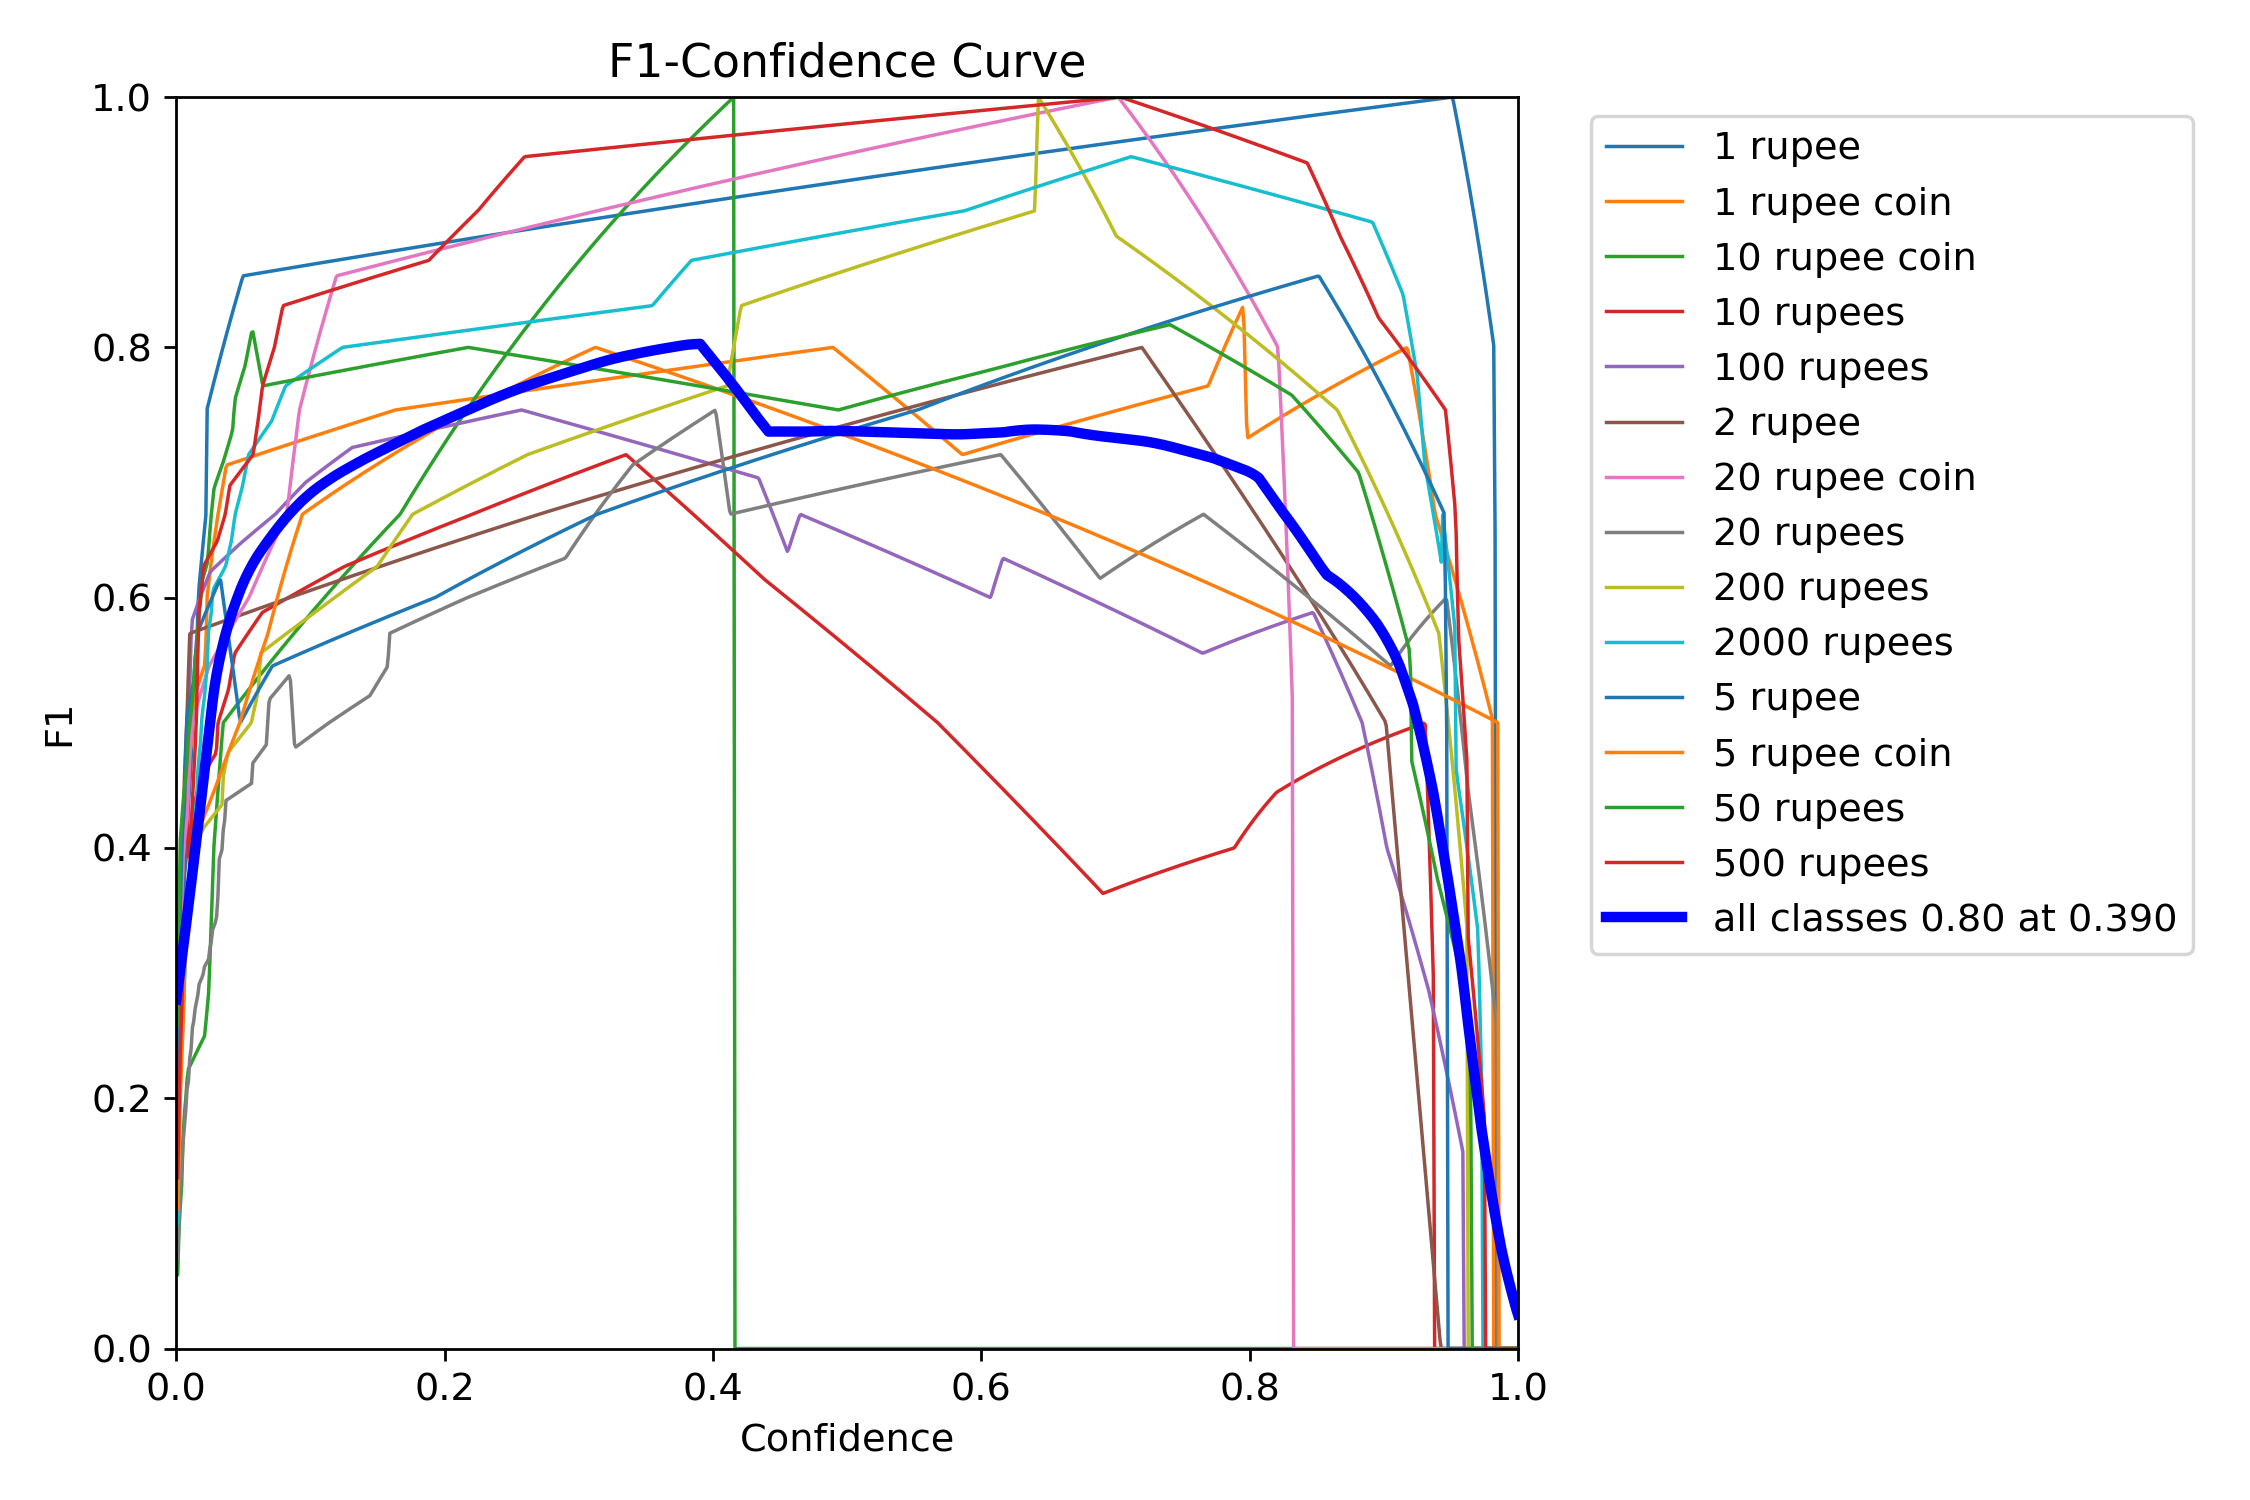

In [ ]:
Image(filename=f'/content/runs/detect/val/F1_curve.png', width=600)


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs

image 1/31 /content/IndianCurrency-4/test/images/df6c313d-5701-4af4-baf6-85d5b21238ad_jpg.rf.b7d5bc3688ada36483ba15b84e498e77.jpg: 640x640 1 10 rupees, 1 20 rupees, 37.1ms
image 2/31 /content/IndianCurrency-4/test/images/download_jpg.rf.1ebc94067a12fe384681b24761e8c85e.jpg: 640x640 1 5 rupee coin, 37.2ms
image 3/31 /content/IndianCurrency-4/test/images/download_jpg.rf.4cd7b15b0dd8e358acefc35a127bca23.jpg: 640x640 1 5 rupee coin, 37.1ms
image 4/31 /content/IndianCurrency-4/test/images/download_jpg.rf.85aac3709e0765d35efe541c3f5481e2.jpg: 640x640 1 5 rupee coin, 37.1ms
image 5/31 /content/IndianCurrency-4/test/images/download_jpg.rf.ae64aede488afe79d205384b20611616.jpg: 640x640 1 1 rupee coin, 1 5 rupee coin, 37.1ms
image 6/31 /content/IndianCurrency-4/test/images/download_jpg.rf.b1663421f9ec50289e280434bbbbb8a0.jpg: 640x640

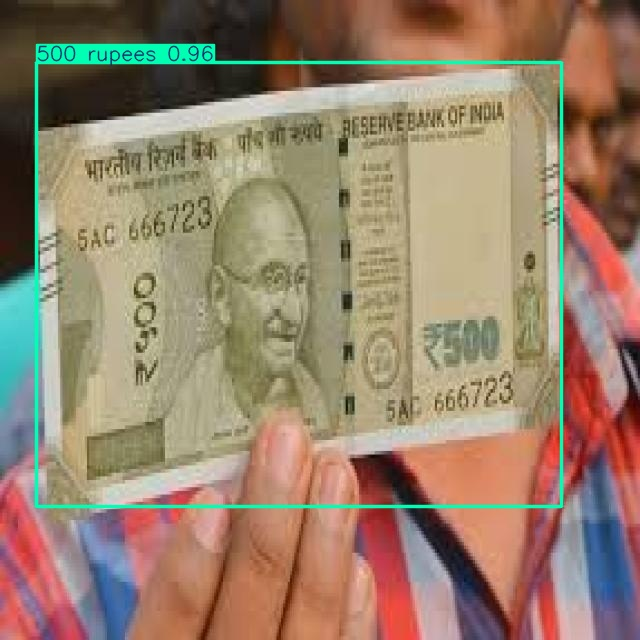

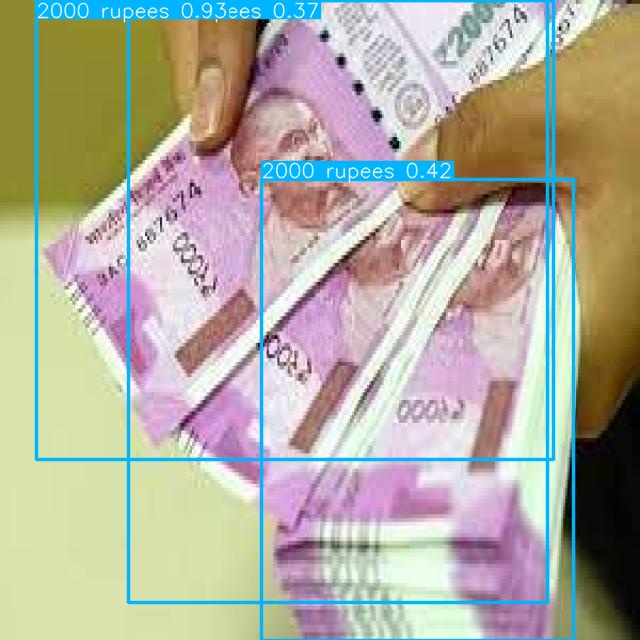

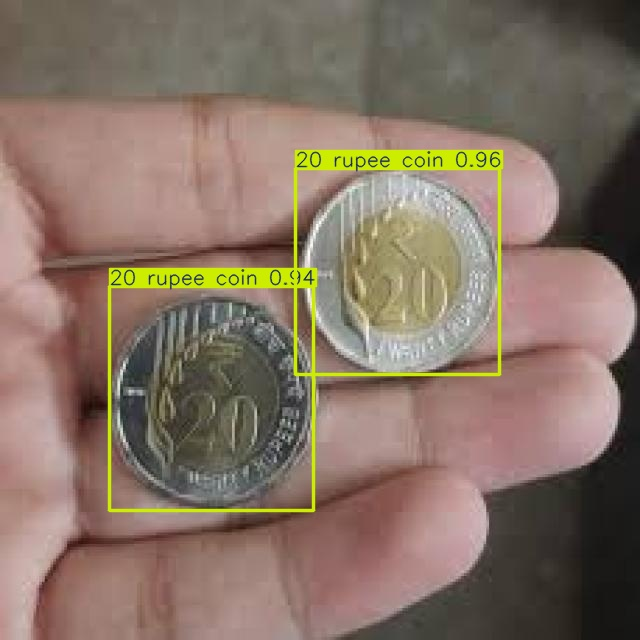

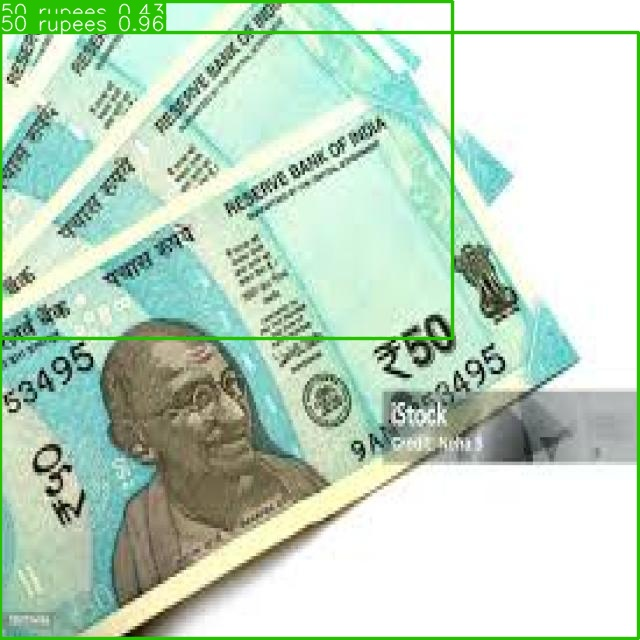

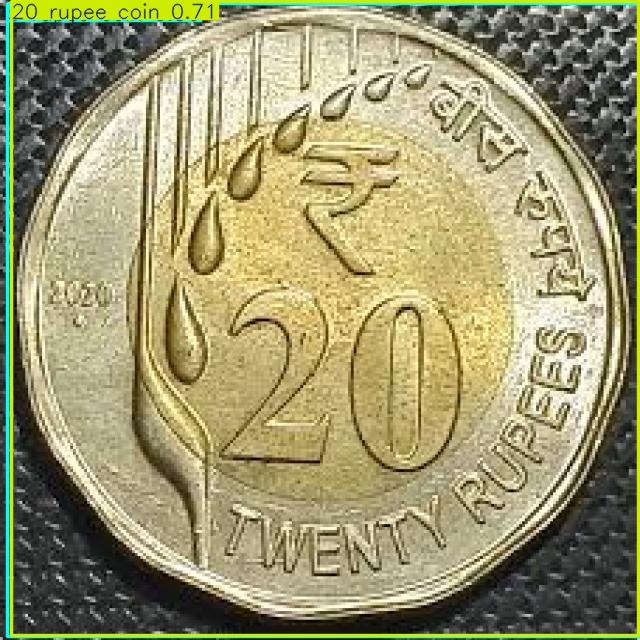

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")